In [0]:
from google.colab import drive
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle 
import numpy as np

In [0]:
#drive.mount("/content/drive")

In [2]:
!unzip "drive/My Drive/deeplearning/dogs-vs-cats.zip"
src_file_zip = "drive/My Drive/deeplearning/dogs-vs-cats.zip"

Archive:  drive/My Drive/deeplearning/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip train.zip
!mkdir src_data

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [0]:
!mv train src_data

In [0]:
!ls src_data

train


In [0]:
src_data_loc = "src_data/train"

In [0]:
def createpath(pathname):
  if os.path.exists(pathname):
    print("Path already exists")
  else:
    os.mkdir(pathname)
    print("Created!")

In [0]:
model_str_path = "drive/My Drive/deeplearning"

In [8]:
validation_dir = "src_data/validation"
createpath(validation_dir)

Created!


In [9]:
test_dir = "src_data/test"
createpath(test_dir)

Created!


In [10]:
train_sub_dir = "src_data/sub_train"
createpath(train_sub_dir)

Created!


In [11]:
sub_train_cats_dir = "src_data/sub_train/cats"
createpath(sub_train_cats_dir)

Created!


In [12]:
sub_train_dogs_dir = "src_data/sub_train/dogs"
createpath(sub_train_dogs_dir)

Created!


In [13]:
validation_cat_dir = "src_data/validation/cats"
createpath(validation_cat_dir)
validation_dog_dir = "src_data/validation/dogs"
createpath(validation_dog_dir)

Created!
Created!


In [0]:
#sub train cats
import shutil
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(sub_train_cats_dir, fname)
  shutil.copyfile(src, des)

In [0]:
#sub train dogs
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(sub_train_dogs_dir, fname)
  shutil.copyfile(src,des)

In [0]:
#validation cats
fnames = ["cat.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(validation_cat_dir, fname)
  shutil.copyfile(src,des)

In [0]:
#validation dogs
fnames = ["dog.{}.jpg".format(i) for i in range(1000,1500)]
for fname in fnames :
  src = os.path.join(src_data_loc, fname)
  des = os.path.join(validation_dog_dir, fname)
  shutil.copyfile(src,des)

In [0]:
print(len(os.listdir(test_dir)))
print(len(os.listdir(sub_train_cats_dir)))
print(len(os.listdir(sub_train_dogs_dir)))
print(len(os.listdir(validation_cat_dir)))
print(len(os.listdir(validation_dog_dir)))

0
1000
1000
500
500


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss = "binary_crossentropy", optimizer = optimizers.RMSprop(), metrics = ['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_sub_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

In [0]:
for data, label in train_generator:
  print("Data shape: ", data.shape)
  print("label shape: ", label.shape)
  print("Label[0]: ", label[0])
  break

In [0]:
def savedata(model, history, iteration):
  model_file = storagepath + "cats_dogs_sub_model" + str(iteration).strip() + ".h5"
  history_file = storagepath + "cats_dogs_sub_history" + str(iteration).strip() + ".pkle"
  model.save(model_file)
  with open(history_file, "wb") as fp:
    pickle.dump(history.history, fp)
  return model_file, history_file

In [0]:
def loaddata(iteration):
  model_file = storagepath + "cats_dogs_sub_model" + str(iteration).strip() + ".h5"
  history_file = storagepath + "cats_dogs_sub_history" + str(iteration).strip() + ".pkle"
  model = models.load_model(model_file)
  with open(history_file, "rb") as fp:
    history = pickle.load(fp)
  return model, history

In [0]:
storagepath = "drive/My Drive/deeplearning/"

In [0]:
history = model.fit(
    train_generator,
    steps_per_epoch = 70,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 30

)
model_file, history_file = savedata(model, history, iteration = 1)
print(model_file, history_file, "saved!")

Epoch 1/30
70/70 [==============================] - 8s 112ms/step - loss: 6.7495e-11 - acc: 1.0000 - val_loss: 11.9024 - val_acc: 0.7233
Epoch 2/30
70/70 [==============================] - 8s 112ms/step - loss: 7.4781e-11 - acc: 1.0000 - val_loss: 10.9520 - val_acc: 0.7333
Epoch 3/30
70/70 [==============================] - 8s 113ms/step - loss: 7.8886e-11 - acc: 1.0000 - val_loss: 11.5463 - val_acc: 0.7267
Epoch 4/30
70/70 [==============================] - 8s 110ms/step - loss: 7.2359e-11 - acc: 1.0000 - val_loss: 10.6499 - val_acc: 0.7217
Epoch 5/30
70/70 [==============================] - 8s 111ms/step - loss: 5.0154e-11 - acc: 1.0000 - val_loss: 12.9517 - val_acc: 0.7267
Epoch 6/30
70/70 [==============================] - 8s 112ms/step - loss: 1.4474e-10 - acc: 1.0000 - val_loss: 11.9047 - val_acc: 0.7200
Epoch 7/30
70/70 [==============================] - 8s 111ms/step - loss: 2.6047e-11 - acc: 1.0000 - val_loss: 12.8237 - val_acc: 0.7117
Epoch 8/30
70/70 [=======================

In [0]:
# model, history = loaddata(iteration = 1)

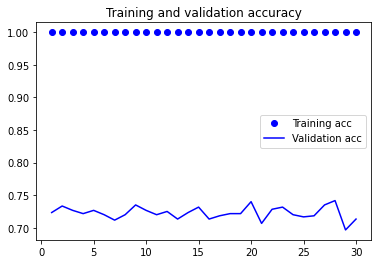

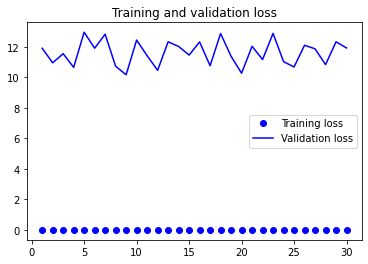

In [0]:
history = history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']

)

In [0]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
)
train_generator = train_datagen.flow_from_directory(
    train_sub_dir,
    batch_size = 20,
    target_size = (150,150),
    class_mode = "binary"
)
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = "binary",
    target_size = (150,150)
)

In [0]:
history  = model.fit(
    train_generator, epochs = 100, steps_per_epoch = 100, validation_data = val_generator, validation_steps = 50
)


Epoch 1/100
100/100 [==============================] - 16s 161ms/step - loss: 0.7453 - acc: 0.5155 - val_loss: 0.6893 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 16s 163ms/step - loss: 0.6955 - acc: 0.5215 - val_loss: 0.6918 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6894 - acc: 0.5645 - val_loss: 0.7668 - val_acc: 0.4930
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6736 - acc: 0.5895 - val_loss: 0.6292 - val_acc: 0.6580
Epoch 5/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6684 - acc: 0.6300 - val_loss: 0.6405 - val_acc: 0.6020
Epoch 6/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6484 - acc: 0.6475 - val_loss: 0.6350 - val_acc: 0.6360
Epoch 7/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6203 - acc: 0.6650 - val_loss: 0.6948 - val_acc: 0.6070
Epoch 8/100
100/100 [===========================

In [0]:
savedata(model, history, 2)
print(model, history,"saved!")

<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f352ec3d470> <tensorflow.python.keras.callbacks.History object at 0x7f352ef4d198> saved!


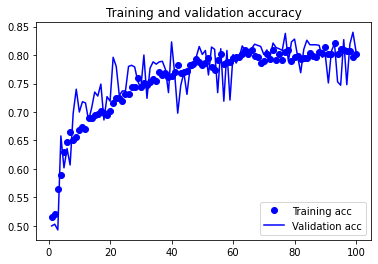

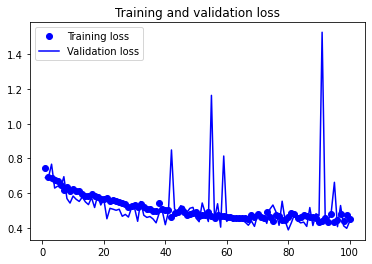

In [0]:
history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
train_main_dir = "src_data/train"
test_cats = "src_data/test/cats"
createpath(test_cats)
test_dogs = "src_data/test/dogs"
createpath(test_dogs)
fnames = ["cat.{}.jpg". format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(train_main_dir, fname)
  des = os.path.join(test_cats, fname)
  shutil.copyfile(src,des)
fnames = ["dog.{}.jpg". format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(train_main_dir, fname)
  des = os.path.join(test_dogs, fname)
  shutil.copyfile(src,des) 

Created!
Created!


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 0 images belonging to 0 classes.


In [0]:
model.evaluate(test_generator, steps = 70)

70/70 [==============================] - 4s 51ms/step - loss: 0.4849 - acc: 0.7993


[0.48489874601364136, 0.7992857098579407]

In [0]:
model.evaluate(test_generator, steps = 512)

512/512 [==============================] - 26s 51ms/step - loss: 0.4782 - acc: 0.8057


[0.47818636894226074, 0.8056640625]

**Feature Exctraction With out data augmentation**

In [0]:
from tensorflow.keras.applications import VGG16

In [17]:
conv_base = VGG16(weights = "imagenet", include_top = False, input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

In [0]:
def feature_ext(directory, sample_count):
  features = np.zeros(shape= (sample_count, 4, 4, 512))
  labels = np.zeros(shape = (sample_count))

  generator = datagen.flow_from_directory(
      directory,
      target_size = (150, 150),
      batch_size = batch_size,
      class_mode = "binary"
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch

    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [0]:
train_features, train_label = feature_ext(train_sub_dir, 2000)
val_features, val_label = feature_ext(validation_dir, 1000)
test_features, test = feature_ext(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
val_features = np.reshape(val_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation = "relu", input_dim = (4 * 4 * 512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile( loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ['acc'])

In [0]:
history = model.fit(
    train_features,
    train_label,
    epochs = 30,
    batch_size = 20,
    validation_data = (val_features, val_label)
)

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.7178 - acc: 0.7565 - val_loss: 0.6360 - val_acc: 0.6980
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3644 - acc: 0.8465 - val_loss: 0.2835 - val_acc: 0.8890
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2697 - acc: 0.8865 - val_loss: 0.2561 - val_acc: 0.9050
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2452 - acc: 0.9000 - val_loss: 0.2395 - val_acc: 0.9070
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2263 - acc: 0.9135 - val_loss: 0.2478 - val_acc: 0.9050
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1780 - acc: 0.9250 - val_loss: 0.3681 - val_acc: 0.8670
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.1691 - acc: 0.9350 - val_loss: 0.2738 - val_acc: 0.9020
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

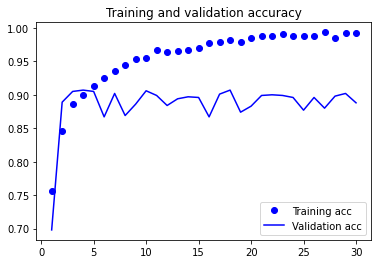

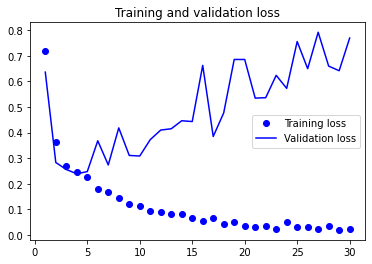

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Feature Extraction with Data Augmentation**

In [23]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu", input_dim = (4* 4* 512)))
model.add(layers.Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
print("number of trainable weights before freezing: ", len(model.trainable_weights))
conv_base.trainable = False
print("number of trainable weights after freezing: ", len(model.trainable_weights))

number of trainable weights before freezing:  30
number of trainable weights after freezing:  4


In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_generator = train_datagen.flow_from_directory(
    train_sub_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary'
    )

test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model.compile( loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(),
              metrics = ['acc'])

history = model.fit(train_generator, epochs = 30, steps_per_epoch = 100, validation_data = validation_generator, validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 21s 208ms/step - loss: 0.7078 - acc: 0.7080 - val_loss: 0.5591 - val_acc: 0.7480
Epoch 2/30
100/100 [==============================] - 20s 204ms/step - loss: 0.4809 - acc: 0.7660 - val_loss: 0.4956 - val_acc: 0.7770
Epoch 3/30
100/100 [==============================] - 21s 206ms/step - loss: 0.4444 - acc: 0.8060 - val_loss: 0.2635 - val_acc: 0.8940
Epoch 4/30
100/100 [==============================] - 21s 206ms/step - loss: 0.4307 - acc: 0.8015 - val_loss: 0.5119 - val_acc: 0.8030
Epoch 5/30
100/100 [==============================] - 20s 205ms/step - loss: 0.3806 - acc: 0.8320 - val_loss: 0.2454 - val_acc: 0.8960
Epoch 6/30
100/100 [==============================] - 20s 205ms/step - loss: 0.3902 - acc: 0.8250 - val_loss: 0.2434 - val_acc: 0.9010
Epoch 7/30
100/100 [==============================] - 21s 206ms/step - loss: 0.3553 - acc: 0.8410 - val_loss: 0.2910 - val_acc: 0.8750
Epoch 8/30
100/100 [==============================] - 2

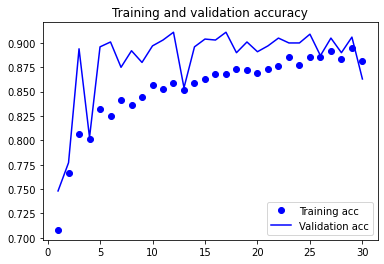

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


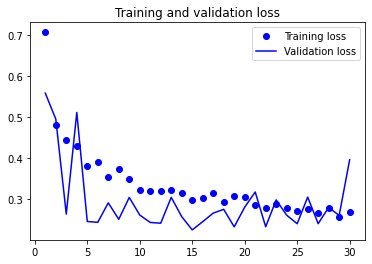

In [0]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Fine Tuning**

In [0]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
conv_base.trainbale = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
    if set_trainable:
      layer.trainbale = True
    else:
      layer.trainbale = False

In [35]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = optimizers.RMSprop(),
    metrics = ['acc']
)

history = model.fit(
   train_generator,
   steps_per_epoch=100,
   epochs=100,
   validation_data=validation_generator,
   validation_steps=50
   )

Epoch 1/100
100/100 [==============================] - 18s 181ms/step - loss: 0.7777 - acc: 0.6920 - val_loss: 0.5496 - val_acc: 0.7350
Epoch 2/100
100/100 [==============================] - 18s 179ms/step - loss: 0.4995 - acc: 0.7710 - val_loss: 0.2814 - val_acc: 0.8760
Epoch 3/100
100/100 [==============================] - 18s 183ms/step - loss: 0.4184 - acc: 0.8115 - val_loss: 0.2729 - val_acc: 0.8850
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.3881 - acc: 0.8140 - val_loss: 0.2519 - val_acc: 0.8950
Epoch 5/100
100/100 [==============================] - 18s 176ms/step - loss: 0.3815 - acc: 0.8285 - val_loss: 0.2752 - val_acc: 0.8860
Epoch 6/100
100/100 [==============================] - 18s 177ms/step - loss: 0.3473 - acc: 0.8470 - val_loss: 0.2733 - val_acc: 0.8870
Epoch 7/100
100/100 [==============================] - 18s 177ms/step - loss: 0.3450 - acc: 0.8515 - val_loss: 0.2520 - val_acc: 0.8990
Epoch 8/100
100/100 [===========================

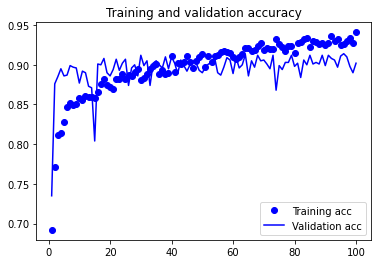

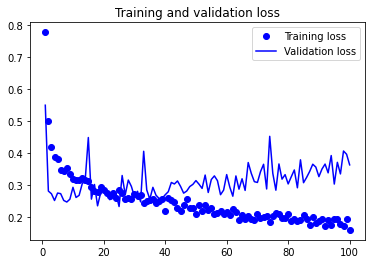

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
def smooth_curve(points, factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor) )
    else:
      smoothed_points.append(point)
  return smoothed_points

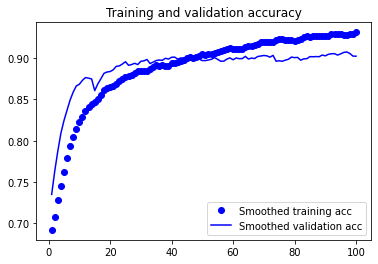

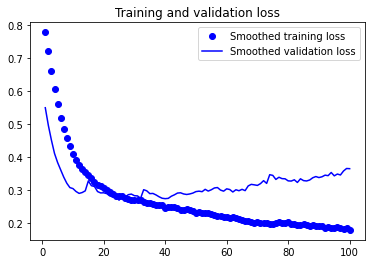

In [40]:
plt.plot(epochs,
smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)


Found 1000 images belonging to 2 classes.


In [44]:
test_loss, test_acc = model.evaluate(test_generator, steps = 50)

50/50 [==============================] - 3s 63ms/step - loss: 0.3617 - acc: 0.9050


In [45]:
print(f"loss: {test_loss} acc: {test_acc}")

loss: 0.3617153465747833 acc: 0.9049999713897705
